# How liberal Austrians have become in the last couple of years?

To answer this research question, we take the **European Values Study 1990-2018 Austria Longitudinal Data (SUF edition)** from [AUSSDA](https://data.aussda.at/dataset.xhtml?persistentId=doi:10.11587/C4YBOT).

We download the dataset and uplod it to Google Colab in a new folder called `data`.

But before we download the data, let us configure the session (i.e., load the reuqired packages):

In [ ]:
install.packages("pacman") # package management tool

pacman::p_load(tidyverse, # data manipulation and visualization
        showtext, # using-non-standard fonts in R graphs
        ggtext, # coloring titles in plots
        sjlabelled, # using SPSS datasets and labels
        MASS, # statistical analysis
        tidymodels # statistical analysis and user-friendly export of models
        )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’



showtext installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘png’, ‘jpeg’, ‘gridtext’



ggtext installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘datawizard’



sjlabelled installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelen

Let us now load the dataset and have a look at the variables:

In [ ]:
# loading the dataset with the read_dta function
df_evs <- haven::read_dta("/content/data/10048_da_en_v1_0-1.dta")

# print the first 10 lines of the dataset
head(df_evs)

version,doi,A001,A002,A003,A004,A005,A006,A008,A009,⋯,v211,v224,v239_r,v239b,v241,v243,v249,v263,v266,weight_cs
<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
1.0 (2019-07-15),doi:10.11587/C4YBOT,1,1,2,2,1,3,2,NA(a),⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),1.25100
1.0 (2019-07-15),doi:10.11587/C4YBOT,1,2,3,3,2,2,1,1,⋯,1,3,0,0,NA(a),6,2,6,5,0.17589
1.0 (2019-07-15),doi:10.11587/C4YBOT,2,1,2,4,1,3,1,NA(a),⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),0.90500
1.0 (2019-07-15),doi:10.11587/C4YBOT,2,1,1,3,3,4,NA(a),NA(a),⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),1.17100
1.0 (2019-07-15),doi:10.11587/C4YBOT,2,1,2,3,1,3,2,1,⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),1.51400
1.0 (2019-07-15),doi:10.11587/C4YBOT,1,1,1,3,2,3,2,2,⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),0.73400


By looking at the [Questionnaire](https://data.aussda.at/file.xhtml?fileId=602&version=1.1) and the [Methods Report](https://data.aussda.at/file.xhtml?fileId=609&version=1.1) we learn that the variable `F118` stands for people's attidutes towards "homosexuality", `S002EVS` represents the year of the wave, and `X001` the biological gender of respondents.

In [ ]:
# selecting and renaming subset of dataset
df <- df_evs |> dplyr::select(year= S002EVS,
                        sex = X001,
                        homosexuality = F118)

# first 10 lines of df
print(df)

# A tibble: 6,440 × 3
   year      sex        homosexuality          
   <dbl+lbl> <dbl+lbl>  <dbl+lbl>              
 1 3 [1999]  1 [Male]   10 [Always justifiable]
 2 5 [2018]  2 [Female]  6 [6]                 
 3 3 [1999]  1 [Male]   10 [Always justifiable]
 4 3 [1999]  2 [Female] 10 [Always justifiable]
 5 2 [1990]  2 [Female]  3 [3]                 
 6 4 [2008]  2 [Female]  3 [3]                 
 7 4 [2008]  1 [Male]    1 [Never justifiable] 
 8 3 [1999]  2 [Female]  7 [7]                 
 9 2 [1990]  1 [Male]   10 [Always justifiable]
10 4 [2008]  2 [Female] 10 [Always justifiable]
# ℹ 6,430 more rows


Let's do a simple linear model to see whether there is a relationship between people's attitudes towars homosexuality and the variables `year` and `sex`.

In [ ]:
# linear model
lm_fit <- lm(homosexuality ~ year + sex, data = df)
summary(lm_fit)


Call:
lm(formula = homosexuality ~ year + sex, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8907 -2.8561 -0.2757  3.1093  6.7474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.62599    0.19419   3.224  0.00127 ** 
year         1.01155    0.03629  27.870  < 2e-16 ***
sex          0.60348    0.08359   7.219 5.85e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.252 on 6172 degrees of freedom
  (265 observations deleted due to missingness)
Multiple R-squared:  0.1161,	Adjusted R-squared:  0.1158 
F-statistic: 405.4 on 2 and 6172 DF,  p-value: < 2.2e-16


The output of this analysis is not looking nicely, so let us print it with another function:

In [ ]:
# tidy version of model
tidy(lm_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.6259851,0.19419140,3.223547,1.272721e-03
year,1.0115536,0.03629479,27.870488,4.069891e-161
sex,0.6034845,0.08359273,7.219343,5.852297e-13


We finally want to do a simple graph showing the data and the relationship:

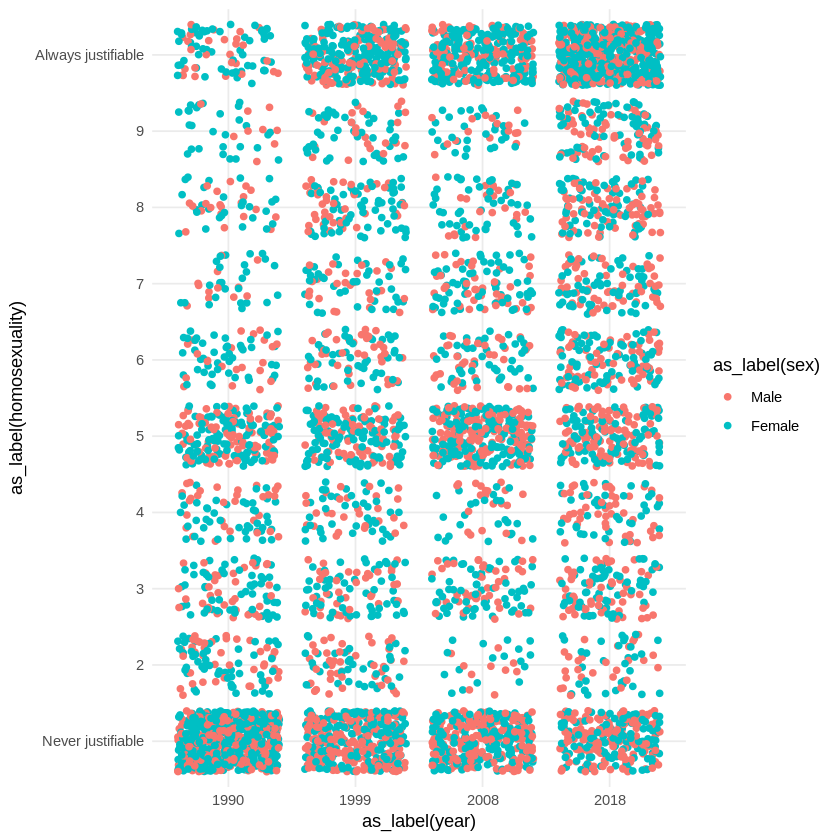

In [ ]:
p <- df |> filter(!is.na(homosexuality)) |> # filter NAs
  group_by(sex, year) |> # group by variables
  # plot year on x- and homosexuality on y-axis; use as_label function so that ggplot2  can handle spss/stat data
  ggplot(aes(as_label(year), as_label(homosexuality), color = as_label(sex))) +
    geom_jitter() + # use geom_jitter to show all data points; prevents overplotting
    theme_minimal()

p

Export this plot to a file in the folder `plots`:

In [ ]:
png(filename = "plots/plot_homosexuality.png",
width = 21.1,
height = 10.2,
units = "in",
res = 300,
bg = "#ffffff"
)

p

dev.off()

pdf 
  2